# 베이지안 분류기
* 각 클래스에 대한 가능도(likelihood) 비교를 통한 분류
* 베이즈 정리의 철학을 바탕으로 작동하는 분류기
* Laplace smoothing
---
## MLE - 모수적인 추정방법

* $$파라미터 \theta = (\theta_{1}, ..., \theta_{m})$$
* $$어떤 확률밀도함수 P(x|\theta)에서 관측된 표본집합 x=x_{1},x_{2}, ..., x_{n}$$
* $$ 이 표본들에서 파라미터 \theta =(\theta_{1}, ... , \theta_{m})을 추정하는 방법$$
---
Q. 어떤 분포로 부터 데이터를 얻었을 가능성(가능도)가 가장 높을까?


* scikit-learn dataset으로부터 iris data load
* 기본 클래스(numpy, pandas) import
```python
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
iris = load_iris()
type(iris)
```

In [113]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
iris = load_iris()
type(iris)

sklearn.utils.Bunch

시각화 패키지(seaborn) import
```python
import seaborn as sns
iris = sns.load_dataset("iris")
```

In [114]:
import seaborn as sns
iris = sns.load_dataset("iris")

In [115]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [116]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


* dataframe 생성
```python
X = iris.drop("species", axis=1) # axis =1 의미는 열방향 즉 species 열방향을 드랍.
y = iris["species"]
X.shape # 150개의 행과 4개의 열
y.shape # 1차원배열, 150개 행 1열
```

In [117]:
X = iris.drop("species", axis=1)
y = iris["species"]

In [118]:
X.shape

(150, 4)

In [119]:
y.shape

(150,)

* KNN 분류기 import
* KNN 분류기의 하이퍼파라메터의 값을 1로 설정
```python
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1) # 하이퍼파라메터에 1의 값을 준다. 5라는 값이 기본값으로 세팅
```

In [120]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

* knn 분류기에 적합
```python
knn.fit(X, y)
```

In [121]:
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

* 예측값 생성
```python
y_pred = knn.predict(X)
```

In [122]:
y_pred = knn.predict(X)

* 정확도 측정
```python
np.mean(y == y_pred)
knn.score(X_test, y_test)
```

* 이때, train data와 test data를 분리하지 않았기 때문에 정확도 100% = 일반화의 오류 문제 발생

In [126]:
np.mean(y == y_pred)

1.0

In [128]:
knn.score(X_test, y_test)

1.0

###  훈련데이터와 테스트 데이터 분리
* sklearn 의 train_test_split 사용 - default. train 75%, test 25%, seed= 10
```python
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=10)
X_train.shape, y_train.shape, X_test.shape, y_test.shape
```

In [162]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=25)

In [163]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((120, 4), (120,), (30, 4), (30,))

* KNN 분류기 import, 하이퍼파라메타 = 1
```python
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
```

In [164]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

* 정확도 재측정
```python
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test) #성능측정
np.mean(y_test == y_pred) # 정확도 90%
knn.score(X_test, y_test) # 정확도 90%
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred) # 정확도 90%
```

In [165]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [166]:
y_pred = knn.predict(X_test)
y_pred

array(['setosa', 'virginica', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'setosa', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'virginica',
       'versicolor', 'virginica', 'virginica', 'setosa'], dtype=object)

In [167]:
np.mean(y_test == y_pred) # 정확도 90%

0.9

In [168]:
knn.score(X_test, y_test) # 정확도 90%

0.9

In [169]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9

In [170]:
train_accuracy = []
test_accuracy = []
neighbors = range(1, 11)
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

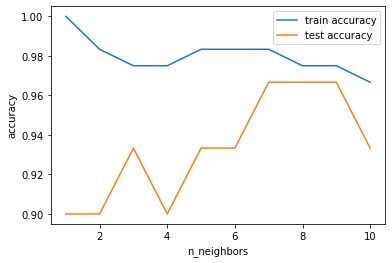

In [178]:
# 시각화
import matplotlib.pyplot as plt

plt.plot(neighbors, train_accuracy, label="train accuracy")
plt.plot(neighbors, test_accuracy, label="test accuracy")
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.legend();

In [179]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)

In [180]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred

array(['setosa', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'setosa', 'setosa', 'virginica', 'setosa', 'versicolor',
       'virginica', 'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'virginica',
       'versicolor', 'virginica', 'virginica', 'setosa'], dtype=object)

In [181]:
knn.score(X_test, y_test)

0.9666666666666667

In [185]:
np.mean(y_test == y_pred)

0.9666666666666667

In [186]:
accuracy_score(y_test, y_pred)

0.9666666666666667